### Purpose

Visualizes the raw data after state has been extracted

In [1]:
%matplotlib inline 

import sys
sys.path.insert(0, '../')
import argparse
import datacommon as cm
import numpy as np
import matplotlib.pyplot as plt
from numpy import double
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [4]:
task_list = ['rc_loop', 'throttle_loop', 'update_GPS', 'update_batt_compass',
            'read_aux_switches', 'arm_motors_check', 'auto_trim', 
            'update_altitude', 'run_nav_updates', 'update_thr_average', 
            'three_hz_loop', 'compass_accumulate', 'barometer_accumulate', 
            'update_notify', 'one_hz_loop', 'ekf_check', 'crash_check',
            'landinggear_update', 'lost_vehicle_check', 'gcs_check_input', 
            'gcs_send_heartbeat', 'gcs_send_deferred', 'gcs_data_stream_send', 
            'update_mount', 'ten_hz_logging_loop', 'fifty_hz_logging_loop', 
            'full_rate_logging_loop', 'perf_update', 'read_receiver_rssi', 
            'frsky_telemetry_send', 'epm_update']

# Created the appropriate indices for task list
task_indices = dict(zip(task_list, xrange(0,len(task_list))))

In [94]:
#Correct alt taken from 2
raw_correct = cm.processFile("../data/3.5.1/freq_fixed.txt", 
                             dtypes=float, skip=1, delimiter=' ')
raw_newbug = cm.processFile("../data/3.5.1/freq_bug.txt", 
                         dtypes=float, skip=1, delimiter=' ')

In [95]:
correct_states = raw_correct
newbug_states = raw_newbug
# unitsbug_states = raw_unitsbug

## Software - Ardupilot

## Scenario - UAV starts at home, takes off. Flying over 4 randomly generated way points at differing altitudes, goes back home, lands and shuts off

## BUG 2194

In [ ]:
#### 2194

# Module: control_guided.pde
# static void guided_posvel_control_run()
# {
    ...
    ...
    # // calculate dt
    # float dt = pos_control.time_since_last_xy_update();

    # // update at poscontrol update rate
    # if (dt >= pos_control.get_dt_xy()) {    
    #     ....    
    #     pos_control.update_z_controller(); <== BUG
    # }

# pos_control.update_z_controller(); <== FIX
# }

## Altitude

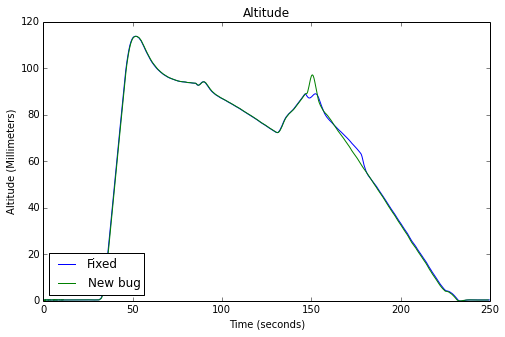

In [96]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), (correct_states[:, 0] - 58500)/ 100.0, label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 0], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), (newbug_states[:, 0] - 58500)/ 100.0, label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Altitude (Millimeters)')
plt.ylim(0,120)
plt.legend(loc='lower left')
plt.title('Altitude')

## Roll

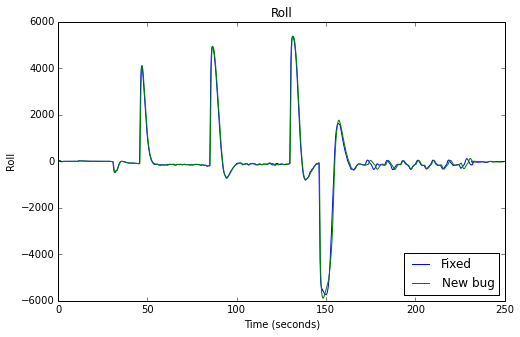

In [97]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), correct_states[:, 1], label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 1], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), newbug_states[:, 1], label='New bug')
plt.legend(loc='lower right')
plt.title('Roll')
plt.xlabel('Time (seconds)')
plt.ylabel('Roll')

## Pitch

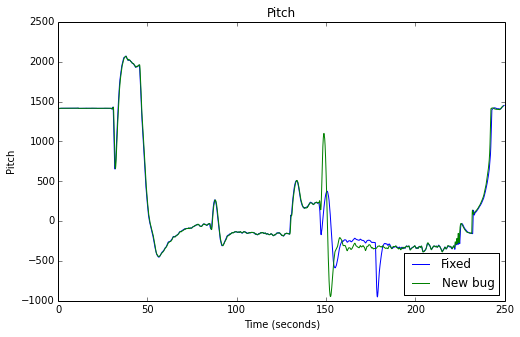

In [98]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), correct_states[:, 2], label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 2], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), newbug_states[:, 2], label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Pitch')
plt.legend(loc='lower right')
plt.title('Pitch')
plt.xlabel('Time (seconds)')

## Yaw

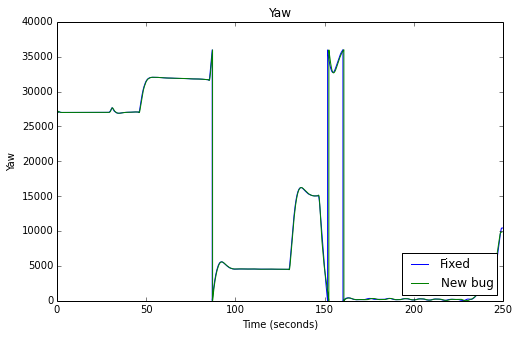

In [99]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), correct_states[:, 3], label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 3], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), newbug_states[:, 3], label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Yaw')
plt.legend(loc='lower right')
plt.title('Yaw')
plt.xlabel('Time (seconds)')

## Relative Position - North

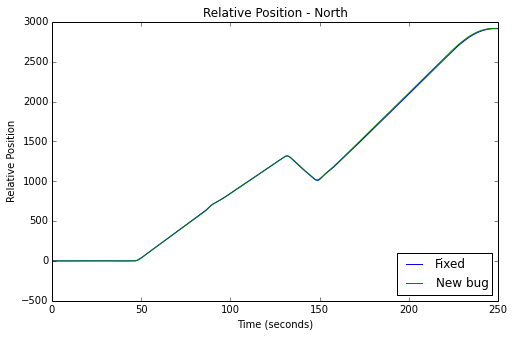

In [100]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), correct_states[:, 4], label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 4], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), newbug_states[:, 4], label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Position')
plt.title('Relative Position - North')
plt.legend(loc='lower right')

## Relative Position - East

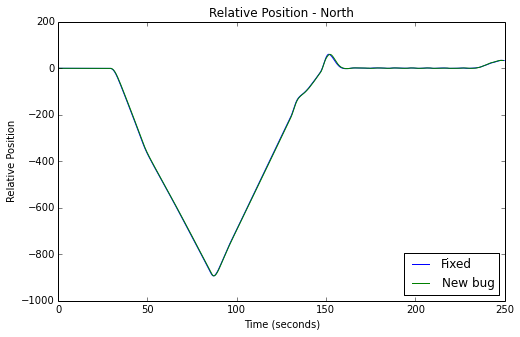

In [101]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), correct_states[:, 5], label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 4], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), newbug_states[:, 5], label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Position')
plt.title('Relative Position - North')
plt.legend(loc='lower right')

## Relative Position - Down (Can think of this as altitude)

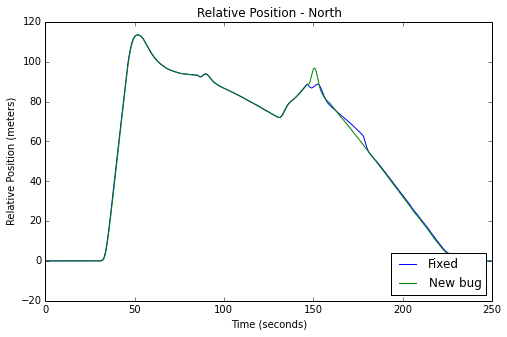

In [102]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), -correct_states[:, 6], label='Fixed')
# plt.plot(map(lambda x: x/50.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 5], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), -newbug_states[:, 6], label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Position (meters)')
plt.title('Relative Position - North')
plt.legend(loc='lower right')

## Relative Velocity North

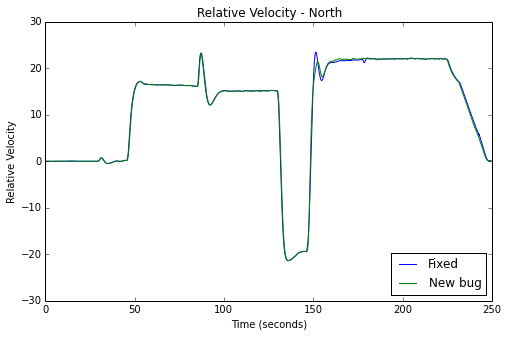

In [103]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), correct_states[:, 7], label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 7], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), newbug_states[:, 7], label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Velocity')
plt.title('Relative Velocity - North')
plt.legend(loc='lower right')

## Relative Velocity East

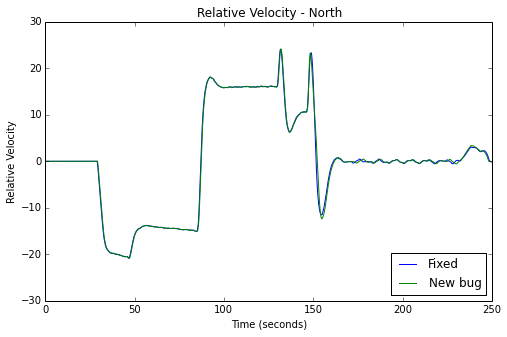

In [104]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), correct_states[:, 8], label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 7], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), newbug_states[:, 8], label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Velocity')
plt.title('Relative Velocity - North')
plt.legend(loc='lower right')

## Relative Velocity Down

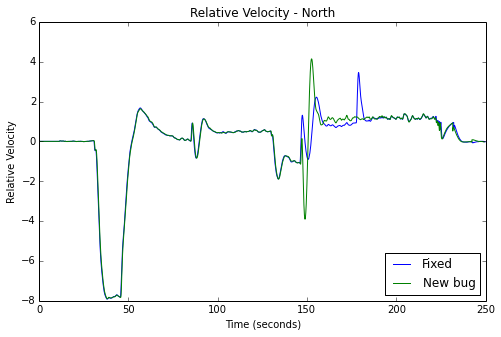

In [105]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), correct_states[:, 9], label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 8], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), newbug_states[:, 9], label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Velocity')
plt.title('Relative Velocity - North')
plt.legend(loc='lower right')

## Throttle

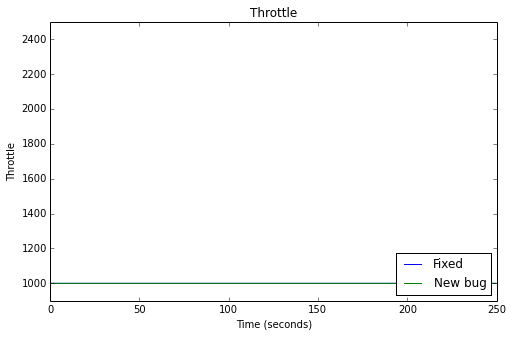

In [106]:
plt.plot(map(lambda x: x/50.0, xrange(correct_states.shape[0])), correct_states[:, 10], label='Fixed')
# plt.plot(map(lambda x: x/400.0, xrange(unitsbug_states.shape[0])), unitsbug_states[:, 9], label='Units bug')
plt.plot(map(lambda x: x/50.0, xrange(newbug_states.shape[0])), newbug_states[:, 10], label='New bug')
plt.xlabel('Time (seconds)')
plt.ylabel('Throttle')
plt.title('Throttle')
plt.ylim(900, 2500)
plt.legend(loc='lower right')